# TP Clustering

This is the TP related to clustering. We will need to import the following libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn as sk

## Exercice 1: Clustering brain teaser

Use a clustering algorithm to obtain a relevant clustering for each one of the datasets in data0.txt, data1.txt, data2.txt, data3.txt and data4.txt 


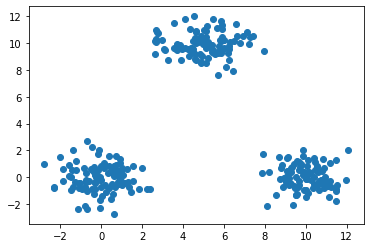

In [3]:
DATA0=np.loadtxt("data0.txt")
X=DATA0[:,0]
Y=DATA0[:,1]
plt.scatter(X,Y)
plt.show()

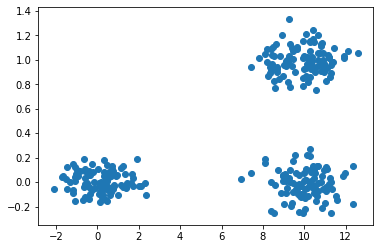

In [4]:
DATA1=np.loadtxt("data1.txt")
X=DATA1[:,0]
Y=DATA1[:,1]
plt.scatter(X,Y)
plt.show()

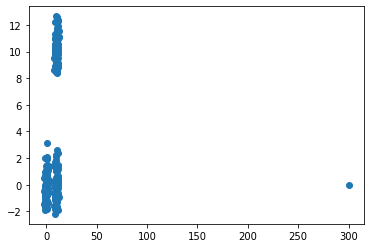

In [5]:
DATA2=np.loadtxt("data2.txt")
X=DATA2[:,0]
Y=DATA2[:,1]
plt.scatter(X,Y)
plt.show()

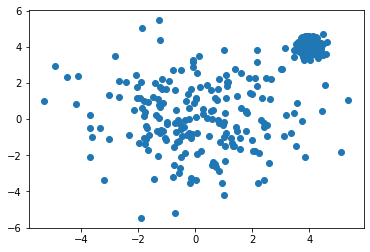

In [6]:
DATA3=np.loadtxt("data3.txt")
X=DATA3[:,0]
Y=DATA3[:,1]
plt.scatter(X,Y)
plt.show()

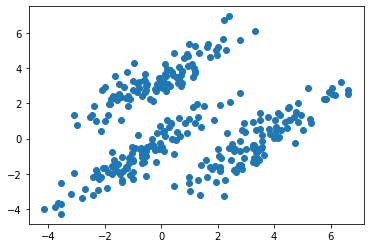

In [7]:
DATA4=np.loadtxt("data4.txt")
X=DATA4[:,0]
Y=DATA4[:,1]
plt.scatter(X,Y)
plt.show()

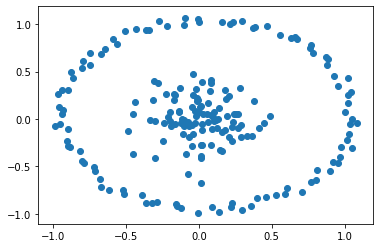

In [8]:
DATA5=np.loadtxt("data5.txt")
X=DATA5[:,0]
Y=DATA5[:,1]
plt.scatter(X,Y)
plt.show()

## Exercice 2: K-means

We will use the following functions.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

### Question 1

Turn the collection of documents stored in text.txt (one document per line) into vectors. You can, for instance, use CountVectorizer or TfidfVectorizer from sklearn.

In [10]:
f=open("train.txt","r")
TEXT=f.readlines()
f.close()

### Question 2

Implement the k-means algorithm to cluster the collection of documents.  
Consider all values in [1, 10] for k. Plot the SSE and the silhoutte score as a function of k and suggest a relevant value for k.  
Try several initialisations for kmeans.  
If your program is too slow, you can select only the most frequent words (say less than 1000 words) in order to reduce the number of dimensions.

### Question 3

Find a good relevant value for k and compute the k clusters.  
Check ”manually” a few texts in the different clusters you obtained and try to label each cluster (find the topic of each cluster of texts).

### Question 3

Design an automatic method to label your clusters and implement it.

### Question 4

Train a classifier of your choice using train.txt and the labels you have inferred.  
Then test your classifier on the provided test set, test.txt.

## Exercice 3:  One dimensional Gaussian Mixture Model

The goal of this exercize is to implement 1D GMM with 3 gaussians as detailed in the course slides 26, 27 and 28.  
Consider the following parameters and the following functions to generate points according the to probability density of three gaussians.

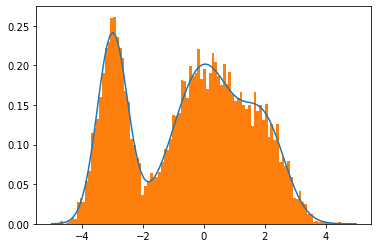

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K=3
PHI=[0.5,0.3,0.2]
MU=[0.,-3.,2.]
SIGMA=[1,0.5,0.7]

def N(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

def p(x):
    proba=0
    for k in range(K):
        proba+=PHI[k]*N(x,MU[k],SIGMA[k])
    return proba

def density(xmin,xmax,points):
    X=np.linspace(-5, 5, 100)
    Y=[]
    for x in X:
        Y.append(p(x))
    return X,Y

def generate(n):
    P=[]
    for i in range(n):
        rand=np.random.random()
        phi_cum=PHI[0]
        for k in range(K):
            if rand<phi_cum:
                break
            phi_cum+=PHI[k+1]
        P.append(np.random.normal(MU[k], SIGMA[k]))
    return P

X,Y=density(-5, 5, 1000)
P=generate(10000)
plt.plot(X,Y)
plt.hist(P,100,density=True)
plt.show()         

### Question

Make a function to fit the probability density function of the points P using gaussian mixture model with 3 gaussians. Test it and compare the obtained density function to the real density function (draw it on the same plot).